# Weekly activity

1.Rotate image by 45 degrees without cropping the sides of the image.(Hint:There are 2 strategies to tackle these problems). Use 'lena.jfif' as the input image.


In [3]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [4]:
import imutils

img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]

# Define the rotation angle in degrees
angle = 45

# Calculate the rotation center
yc, xc = h // 2, w // 2

angle = -45

# Apply the rotation to the image
rotated_image = imutils.rotate_bound(img, angle)

# Display the original and rotated images
show_img("rotation", rotated_image)

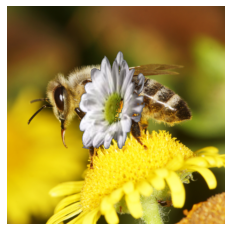

In [5]:
#Q2
import matplotlib.pyplot as plt
img = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

assert img is not None, "file 'images/native-bee.png' could not be read, check with os.path.exists()"
assert img2 is not None, "file 'images/flower.jfif' could not be read, check with os.path.exists()"

# Resize the flower image to match the size of the bee image
img2 = cv.resize(img2, (img.shape[1], img.shape[0]))

# I want to put the flower on the top-left corner, so I create a region of interest (ROI) in the bee image
h, w = img2.shape[:2]
roi = img[:h, :w]

# Now create a mask for the flower and its inverse mask
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(img2_gray, 75, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Black-out the area of the flower in the ROI
img_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# Take only the region of the flower from the flower image
img2_fg = cv.bitwise_and(img2, img2, mask=mask)

# Put the flower in the ROI and modify the main image
dst = cv.add(img_bg, img2_fg)
img[:h, :w] = dst

# Convert bee image from BGR to RGB for matplotlib display
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the modified bee image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


In [6]:
#Q3
img = cv.imread("images/native-bee.png")

#sharpening
kernel_3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_5 = np.array([[-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1],
                     [-1, -1, 25, -1, -1],
                     [-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1]])


sharpen_image_3 = cv.filter2D(img, -1, kernel_3)
sharpen_image_5 = cv.filter2D(img, -1, kernel_5)
cv.imshow("Original", img)
cv.imshow("sharpen size 3", sharpen_image_3)
show_img("sharpen size 5", sharpen_image_5)

What can be infer from the outputs is
Based on image sharpen size 3 the features or details of the bee have better clarity compare to the original image. 
However, for the sharpen image using the 5x5 matrix the image had been sharpen excessively and causing it to loss quality

In [1]:
# Read the input image
image = cv.imread("images/noise_lena.jpg")

# Apply Gaussian blur
gaussian_blur = cv.GaussianBlur(image, (5, 5), 0)

# Apply median blur
median_blur = cv.medianBlur(image, 5)

# Apply average blur
kernel = np.ones((5, 5), np.float32) / 25
average_blur = cv.filter2D(image, -1, kernel)

# Display the original and smoothed images
cv.imshow('Original Image', image)
cv.imshow('Gaussian Blur', gaussian_blur)
cv.imshow('Median Blur', median_blur)
cv.imshow('Average Blur', average_blur)

#Gaussian blur and median blur showed visible improvements in image
#quality compared to the original but average blur may not be as 
#effective in reducing the salt-and-pepper noise

NameError: name 'cv' is not defined